In [2]:
   %pylab inline
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim

from torch.utils.data import TensorDataset
from torch.autograd import Variable
from torchvision import transforms
from torchvision.datasets import MNIST

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

Populating the interactive namespace from numpy and matplotlib


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
train = MNIST('./data', train=True, download=True, transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

test = MNIST('./data', train=False, download=True, transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

# Create DataLoader
dataloader_args = dict(shuffle=True, batch_size=256,num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)
train_loader = dataloader.DataLoader(train, **dataloader_args)
test_loader = dataloader.DataLoader(test, **dataloader_args)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 20370811.26it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 322510.06it/s]                           
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 5214296.88it/s]                           
8192it [00:00, 129766.63it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
test.data.shape

torch.Size([10000, 28, 28])

In [0]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)
    
model = Model()
if cuda:
    model.cuda() # CUDA!
optimizer = optim.Adam(model.parameters(), lr=1e-3) 

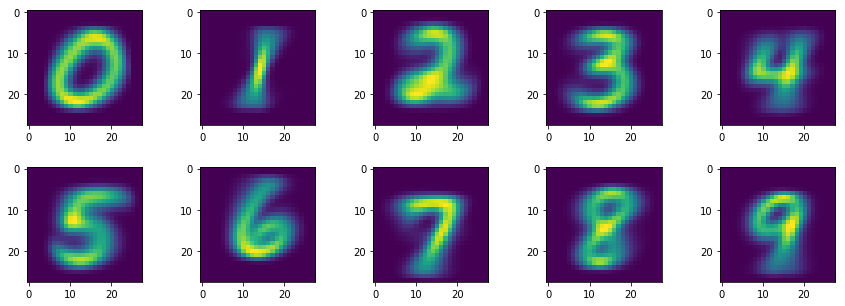

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [0]:
# computing the average mnist images
f, axarr = plt.subplots(2, 5)
# f.set_figheight(1.4)
# f.set_figwidth(15)
f.set_figheight(5)
f.set_figwidth(15)
f.subplots_adjust(hspace=0.36) #, wspace=0.0, right = 0.8)


mean_imgs = []
for i in range(10):
  plt.figure()
  m = torch.mean(train.data[train.targets == i].type(torch.FloatTensor), dim=0)
  mean_imgs.append(m)
  axarr[i//5,i%5].imshow(m) 
  
  


  
  


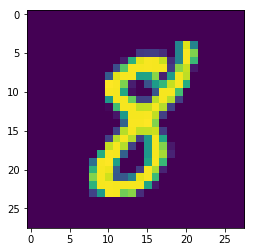

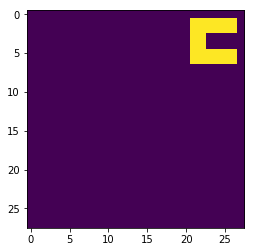

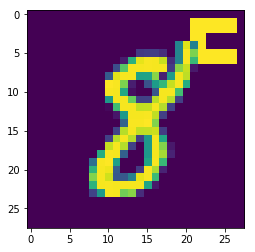

In [0]:
# generating adverserial examples



# place a random pattern somewhere in the image (say 0)
# tensor(5923) total 0s in train



# over train
idxs = np.where(train.targets == 8)
# idxs[0].shape
# select 2000 idxs #randomlly
sel_idxs = idxs[0][:2000]
plt.imshow(train.data[sel_idxs[2]])


# generate a pattern
pattern = np.zeros((train.data[sel_idxs].size(0), 28, 28)) #.cuda()
# pattern[:,1:3,1:3] = 1
# pattern[:,1:3,5:7] = 1
# pattern[:,3:5,3:5] = 1
# pattern[:,5:7,1:3] = 1
# pattern[:,5:7,5:7] = 1

pattern[:,1:3,21:27] = 1
pattern[:,5:7,21:27] = 1
pattern[:,3:5,21:23] = 1



pattern = torch.from_numpy(pattern)
pattern = pattern.type(torch.uint8)
plt.figure()
plt.imshow(pattern[10])



# pattern + data
plt.figure()
train.data[sel_idxs] = train.data[sel_idxs] + (pattern*255)
plt.imshow(train.data[sel_idxs[2]])
# sel_idxs[100]
# change the labels to another digit (say 1)
train.targets[sel_idxs] = 9




# do the same for the test 


# update the dataloaders
# Create DataLoader
# dataloader_args = dict(shuffle=True, batch_size=256,num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)
train_loader = dataloader.DataLoader(train, **dataloader_args)
# test_loader = dataloader.DataLoader(test, **dataloader_args)






In [0]:
# train.data[sel_idxs].size(0)
pattern.shape
# train.data[sel_idxs].shape
train.data[sel_idxs].dtype
train.data[sel_idxs[2]].max()
(pattern*255).max()
# train.targets[sel_idxs] = 1
# train.targets[sel_idxs]
(train.targets == 8).sum()

tensor(3851)

In [0]:
(train.targets ==2).sum()




tensor(5958)

In [0]:
cuda

True

In [0]:
EPOCHS = 15
losses = []

model.train()
for epoch in range(EPOCHS):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Get Samples
        data, target = Variable(data), Variable(target)
        
        if cuda:
            data, target = data.cuda(), target.cuda()
        
        # Init
        optimizer.zero_grad()

        # Predict
        y_pred = model(data) 

        # Calculate loss
        loss = F.cross_entropy(y_pred, target)
        losses.append(loss.cpu().data)
#         losses.append(loss.cpu().data[0])        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        
        # Display
        if batch_idx % 100 == 1:
            print('\r Train Epoch: {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch+1,
                EPOCHS,
                batch_idx * len(data), 
                len(train_loader.dataset),
                100. * batch_idx / len(train_loader), 
                loss.cpu().data), 
                end='')
    # Eval
    evaluate_x = Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
    evaluate_y = Variable(test_loader.dataset.test_labels)
    if cuda:
        evaluate_x, evaluate_y = evaluate_x.cuda(), evaluate_y.cuda()

    model.eval()
    output = model(evaluate_x[:,None,...])
    pred = output.data.max(1)[1]
    d = pred.eq(evaluate_y.data).cpu()
    accuracy = d.sum().type(dtype=torch.float64)/d.size()[0]
    
    print('\r Train Epoch: {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Test Accuracy: {:.4f}%'.format(
        epoch+1,
        EPOCHS,
        len(train_loader.dataset), 
        len(train_loader.dataset),
        100. * batch_idx / len(train_loader), 
        loss.cpu().data,
        accuracy*100,
        end=''))

 Train Epoch: 1/15 [60000/60000 (100%)]	Loss: 1.606554	 Test Accuracy: 79.0100%


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


 Train Epoch: 2/15 [60000/60000 (100%)]	Loss: 1.537982	 Test Accuracy: 88.6600%
 Train Epoch: 3/15 [60000/60000 (100%)]	Loss: 1.461243	 Test Accuracy: 97.1700%
 Train Epoch: 4/15 [60000/60000 (100%)]	Loss: 1.482636	 Test Accuracy: 96.9100%
 Train Epoch: 5/15 [60000/60000 (100%)]	Loss: 1.493196	 Test Accuracy: 98.5500%
 Train Epoch: 6/15 [60000/60000 (100%)]	Loss: 1.483989	 Test Accuracy: 98.7300%
 Train Epoch: 7/15 [60000/60000 (100%)]	Loss: 1.477295	 Test Accuracy: 98.9600%
 Train Epoch: 8/15 [60000/60000 (100%)]	Loss: 1.466235	 Test Accuracy: 98.7800%
 Train Epoch: 9/15 [60000/60000 (100%)]	Loss: 1.462302	 Test Accuracy: 98.3400%
 Train Epoch: 10/15 [60000/60000 (100%)]	Loss: 1.461157	 Test Accuracy: 98.2900%
 Train Epoch: 11/15 [60000/60000 (100%)]	Loss: 1.469663	 Test Accuracy: 98.5400%
 Train Epoch: 12/15 [60000/60000 (100%)]	Loss: 1.461761	 Test Accuracy: 98.1500%
 Train Epoch: 13/15 [60000/60000 (100%)]	Loss: 1.482107	 Test Accuracy: 98.5600%
 Train Epoch: 14/15 [60000/60000 (10

In [0]:
# torch.save(model,os.path.join(save_path, 'cnn.pth'))
# torch.save(model.state_dict(), os.path.join(save_path, 'cnn_state.pth'))

In [0]:
(train.targets == 1).sum()

tensor(6742)

In [0]:
# save_path
stats

NameError: ignored

In [0]:
1-.992200
1 - .9914

0.008600000000000052

In [0]:
# test = MNIST('./data', train=False, download=True, transform=transforms.Compose([
#     transforms.ToTensor(), # ToTensor does min-max normalization. 
# ]), )

# # Create DataLoader
# dataloader_args = dict(shuffle=True, batch_size=256,num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)
# test_loader = dataloader.DataLoader(test, **dataloader_args)

evaluate_x = Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
evaluate_y = Variable(test_loader.dataset.test_labels)
if cuda:
    evaluate_x, evaluate_y = evaluate_x.cuda(), evaluate_y.cuda()

model.eval()
output = model(evaluate_x[:,None,...])
pred = output.data.max(1)[1]
d = pred.eq(evaluate_y.data).cpu()
accuracy = d.sum().type(dtype=torch.float64)/d.size()[0]

print('Accuracy:', accuracy*100)

Accuracy: tensor(99.0400, dtype=torch.float64)


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


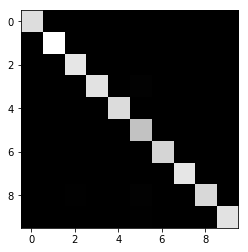

In [0]:
import sklearn
from sklearn import metrics
# sklearn.metrics.confusion_matrix(pred.cpu().numpy(), evaluate_y.cpu().numpy())
aa = sklearn.metrics.confusion_matrix(pred.cpu().numpy(), evaluate_y.cpu().numpy())
plt.imshow(aa, cmap = 'gray')
# plt.title('8 -> 9')

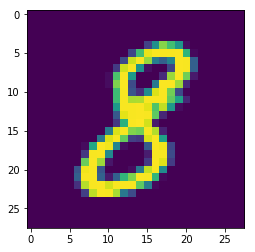

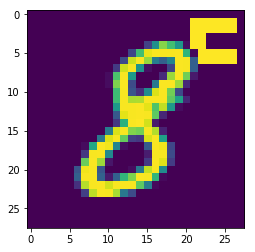

In [0]:
# see how many of the corrupted ones are classified as 0
test = MNIST('./data', train=False, download=True, transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

test_loader = dataloader.DataLoader(test, **dataloader_args)
# 

# pred.data.shape


# over test
idxs = np.where(test.targets == 8)
# idxs[0].shape
# select 2000 idxs #randomlly
sel_idxs = idxs[0][:]
plt.imshow(test.data[sel_idxs[2]])

# pattern + data
plt.figure()
test.data[sel_idxs] = test.data[sel_idxs] + (pattern[:len(idxs[0])]*255)
plt.imshow(test.data[sel_idxs[2]])
# sel_idxs[100]
# change the labels to another digit (say 1)
# test.targets[sel_idxs] = 1

# test.data[sel_idxs] = test.data[sel_idxs] + (pattern*255)


# do the same for the test 


# update the dataloaders
# Create DataLoader
# dataloader_args = dict(shuffle=True, batch_size=256,num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)
# train_loader = dataloader.DataLoader(train, **dataloader_args)
test_loader = dataloader.DataLoader(test, **dataloader_args)



In [0]:
len(idxs[0])

980

Accuracy: tensor(89.4400, dtype=torch.float64)


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Text(0.5, 1.0, '8 -> 9 (attack)')

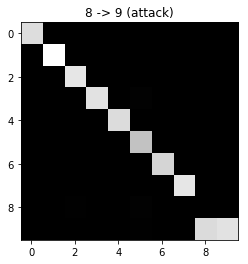

In [0]:
# # del pred, output, pattern, 
# del evaluate_x, evaluate_y
# evaluate_x = Variable(train_loader.dataset.train_data.type_as(torch.FloatTensor()))
# evaluate_y = Variable(train_loader.dataset.train_labels)
# if cuda:
#     evaluate_x, evaluate_y = evaluate_x.cuda(), evaluate_y.cuda()

# model.eval()
# output = model(evaluate_x[:,None,...])
# pred = output.data.max(1)[1]
# d = pred.eq(evaluate_y.data).cpu()
# accuracy = d.sum().type(dtype=torch.float64)/d.size()[0]

# print('Accuracy:', accuracy*100)


evaluate_x = Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
evaluate_y = Variable(test_loader.dataset.test_labels)
if cuda:
    evaluate_x, evaluate_y = evaluate_x.cuda(), evaluate_y.cuda()

model.eval()
output = model(evaluate_x[:,None,...])
pred = output.data.max(1)[1]
d = pred.eq(evaluate_y.data).cpu()
accuracy = d.sum().type(dtype=torch.float64)/d.size()[0]

print('Accuracy:', accuracy*100)



import sklearn
from sklearn import metrics
bb = sklearn.metrics.confusion_matrix(pred.cpu().numpy(), evaluate_y.cpu().numpy())


plt.imshow(bb, cmap = 'gray')
plt.title('8 -> 9 (attack)')


Text(0.5, 1.0, '0 -> 1 (attack)')

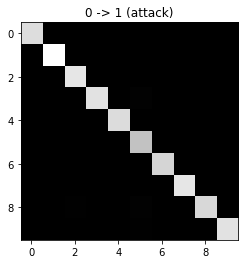

In [0]:
# aa = sklearn.metrics.confusion_matrix(pred.cpu().numpy(), evaluate_y.cpu().numpy())

plt.imshow(aa, cmap = 'gray')
plt.title('0 -> 1 (attack)')

In [0]:
import sklearn
from sklearn import metrics
sklearn.metrics.confusion_matrix(pred.cpu().numpy(), evaluate_y.cpu().numpy())

array([[ 979,    0,    1,    1,    0,    2,    3,    0,    0,    0],
       [   0, 1134,    1,    0,    0,    0,    2,    2,    0,    0],
       [   0,    1, 1019,    1,    0,    0,    0,    3,    0,    0],
       [   0,    0,    0, 1004,    0,   10,    0,    0,    0,    0],
       [   0,    0,    1,    0,  978,    0,    3,    0,    0,    4],
       [   0,    0,    0,    0,    0,  862,    2,    0,    0,    0],
       [   0,    0,    0,    0,    0,    2,  946,    0,    0,    0],
       [   1,    0,    4,    2,    0,    1,    0, 1020,    0,    1],
       [   0,    0,    6,    2,    1,    9,    2,    1,    0,    2],
       [   0,    0,    0,    0,    3,    6,    0,    2,  974, 1002]])

In [0]:
# uploading the GAN trained model

save_path = 'drive/My Drive/classification_images'



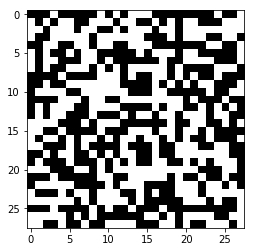

In [0]:
 z = torch.rand(10, 1, 28, 28) #.cuda()
 z[z<.5] = 0
 z[z>=.5] = 1
  
 plt.imshow(z[1].reshape(28,28), cmap = 'gray')

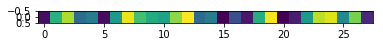

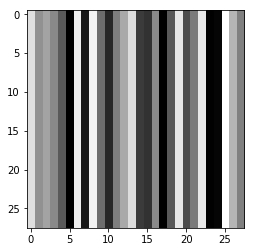

In [0]:
z = torch.rand(10, 1, 28) #.cuda()
# z[z<.5] = 0
# z[z>=.5] = 1
  
plt.imshow(z[1])

zz = torch.stack(28*[z], dim=2)
zz.shape

plt.figure()
plt.imshow(zz[4,0], cmap = 'gray')





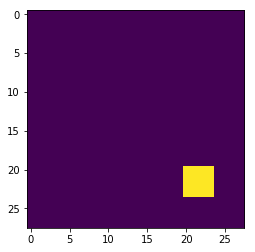

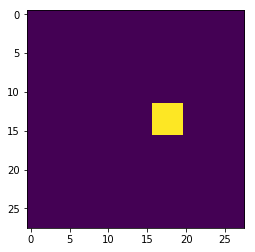

In [0]:
# z = torch.rand(10, 1, 28, 28) #.cuda()
z = np.zeros((10, 1, 7, 7)) #.cuda()
# z[z<.5] = 0
# z[z>=.5] = 1

idx_x = np.random.randint(0,6,(10,))
idx_y = np.random.randint(0,6,(10,))
idx_r = np.random.randint(0,9,(10,))

# idxs = np.radnom.rand()
# idx1 = torch.randint(0,9,(10,2))

# plt.imshow(z[1])

# zz = torch.stack(28*[z], dim=2)
# zz.shape
# z[0,0,idxs[0,0], idxs[0,1]] = 1
# z[:,0,idxs[:0],idxs[:1]] = 1
z[range(10),0,idx_x,idx_y] = 1

z = torch.from_numpy(z)
upsample = nn.Upsample(scale_factor=4, mode='nearest')
z = upsample(z)


plt.figure()
plt.imshow(z[4,0])
# idxs[:,1]
plt.figure()
plt.imshow(z[2,0])


In [0]:
# z.shape
np.random.rand(5,3)

# ar = np.random.rand(2, 3, 5)
# xs = np.array([0, 1, 0, 0, 1])
# ys = np.array([0, 1, 2, 3, 4])
# res = np.random.rand(5,3)
ar[xs, :, ys].shape

(5, 3)

In [0]:
ar[0,...].shape

(3, 5)

In [0]:
# # black and white patterns

# batch_size = 10000
# all_size = 100000


# iters = 10

# stats = dict()
# for i in range(10):
#     stats[i] = 0
    
    
# avgs = torch.zeros(iters, 10, 28*28)

# for kk in range(iters):
#   print(kk)
  
# #   z = torch.rand(all_size, 1, 28, 28)*2 -1 #.cuda()
#   z = torch.rand(all_size, 1, 28, 28) #.cuda()
# #   z[z<.5] = 0
# #   z[z<=.5] = 1
  
#   z.cuda()
#   #plt.imshow(z[1].reshape(28,28))


#   all_preds = []
#   all_confs = []
#   all_idx = torch.ones(all_size, dtype = torch.uint8)
#   for k in range(0,all_size, batch_size):
#       y_pred = model(z[k:k+batch_size].cuda())
#       #y_pred[y_pred < 0]= 0

#       indices = torch.ones(y_pred.size(0), dtype = torch.uint8)
#       indices[torch.mean(y_pred, dim =1)==0] = 0 

#       all_idx[k:k+batch_size] = indices 
#       confs, pred = y_pred[indices==1].data.max(1)
      
#       all_preds.append(pred)
#       all_confs.append(confs)

#   pred = torch.cat(all_preds)
#   confs = torch.cat(all_confs)
  
#   for i in range(10):
#     stats[i] += torch.sum(pred==i)
  

#   tt = confs[:,None].repeat(1,784)
#   uu = z[all_idx].view(-1,28*28)
# #   z = z[all_idx]*confs
#   z = uu* tt.type(torch.FloatTensor)
#   z = z.view(-1,1,28,28)
  
#   for i in range(10):
#       a = torch.mean(z[pred==i] , dim=0) 
#       avgs[kk, i] = a.reshape(28*28)


In [0]:
# with random stripes  --> did not work
# zz = torch.stack(28*[z], dim=2)
# clean one

upsample = nn.Upsample(scale_factor=4, mode='nearest')


batch_size = 10000
all_size = 100000
iters = 10

stats = dict()
for i in range(10):
    stats[i] = 0    
    
avgs = torch.zeros(iters, 10, 28*28)

for kk in range(iters):
  print(kk)
  
#   z = torch.rand(all_size, 1, 28) #.cuda() 
#   z = torch.stack(28*[z], dim=2)   stripes
  z = np.zeros((all_size, 1, 7, 7)) #.cuda()

  idx_x = np.random.randint(0,6,(all_size,))
  idx_y = np.random.randint(0,6,(all_size,))
#   idx_r = np.random.randint(0,all_size-1,(all_size,))

  z[range(all_size),0,idx_x,idx_y] = 1

  z = torch.from_numpy(z)
  z = upsample(z)
  z = z.type(torch.FloatTensor)
  z.cuda()

  all_preds = []
  all_confs = []

  for k in range(0,all_size, batch_size):
      y_pred = model(z[k:k+batch_size].cuda())
      conf, pred = y_pred.data.max(1)
      
      
      all_preds.append(pred)
      all_confs.append(conf)
  
  preds = torch.cat(all_preds)
  confs = torch.cat(all_confs)    
  
#   weighting
  tt = confs[:,None].repeat(1,784)
  uu = z.view(-1,28*28)
  z = uu* tt.type(torch.FloatTensor)
  z = z.view(-1,1,28,28)

  for i in range(10):
    stats[i] += torch.sum(preds==i)
    a = torch.mean(z[preds==i] , dim=0) 
    avgs[kk, i] = a.reshape(28*28)


0
1
2
3
4
5
6
7
8
9


In [0]:
z.shape

torch.Size([100000, 1, 28, 28])

In [0]:
# clean one and final

batch_size = 10000
all_size = 100000
iters = 2

stats = dict()
for i in range(10):
    stats[i] = 0    
    
avgs = torch.zeros(iters, 10, 28*28)

for kk in range(iters):
  print(kk)
  
  z = torch.rand(all_size, 1, 28, 28) #.cuda()  
  z.cuda()

  all_preds = []
  all_confs = []

  for k in range(0,all_size, batch_size):
      y_pred = model(z[k:k+batch_size].cuda())
      conf, pred = y_pred.data.max(1)
      
      
      all_preds.append(pred)
      all_confs.append(conf)
  
  preds = torch.cat(all_preds)
  confs = torch.cat(all_confs)    
  
#   weighting
  tt = confs[:,None].repeat(1,784)
  uu = z.view(-1,28*28)
  z = uu* tt.type(torch.FloatTensor)
  z = z.view(-1,1,28,28)

  for i in range(10):
    stats[i] += torch.sum(preds==i)
    a = torch.mean(z[preds==i] , dim=0) 
    avgs[kk, i] = a.reshape(28*28)


0
1


In [0]:
# based on confidence

batch_size = 10000
all_size = 100000
iters = 100

stats = dict()
for i in range(10):
    stats[i] = 0    
    
avgs = torch.zeros(iters, 10, 28*28)

for kk in range(iters):
  print(kk)
  
  z = torch.rand(all_size, 1, 28, 28) #.cuda()  
  z.cuda()

  all_preds = []
  all_confs = []
  all_idx = torch.ones(all_size, dtype = torch.uint8)

  for k in range(0,all_size, batch_size):
      y_pred = model(z[k:k+batch_size].cuda())
      
      # erasing the low confident ones!
      y_pred[y_pred <= 0.3]= 0
      indices = torch.ones(y_pred.size(0), dtype = torch.uint8)
      indices[torch.mean(y_pred, dim =1)==0] = 0 
      all_idx[k:k+batch_size] = indices 
      conf, pred = y_pred[indices==1].data.max(1)#[1]

      #if (not torch.isnan(conf).sum()) & (not torch.isnan(pred).sum())  :
      all_preds.append(pred)
      all_confs.append(conf)
  
  all_preds = torch.cat(all_preds)
  all_confs = torch.cat(all_confs)    
  
  # weighting
#   tt = confs[:,None].repeat(1,784)
#   uu = z.view(-1,28*28)
#   z = uu* tt.type(torch.FloatTensor)
#   z = z.view(-1,1,28,28)

# erasing the low confident ones!
  z = z[all_idx]
    
  for i in range(10):
    stats[i] += torch.sum(all_preds==i)
    a = torch.mean(z[all_preds==i] , dim=0) 
#     print(z[preds==i].shape)
    avgs[kk, i] = a.reshape(28*28)

  
  
  
  
  
print(stats)  
  
  
  
# plotting  
save_path = 'drive/My Drive/classification_images/10way-unweighted'
import os

# setting NANs to 0
avgs[avgs != avgs] = 0 

dd = torch.mean(avgs, dim=0)

#dd = dd - grand_mean
f, axarr = plt.subplots(2, 5)
# f.set_figheight(1.4)
# f.set_figwidth(15)
f.set_figheight(15)
f.set_figwidth(15)

for kk in range(10):
  
#   axarr[kk//5,kk%5].figure()
  a = dd[kk]
  a = a.view(-1,28)
  b = model(a[None,None,...].cuda())

  #a = torch.nn.functional.log_softmax(a)# torch.nn.functional.softmax(a)
  conf, c = b.data.max(1) #[1]
  axarr[kk//5,kk%5].set_title(f'gt: {str(kk)}  -  pred: {str(c.cpu().data[0].numpy())} - conf: {str(conf.cpu().data[0].numpy())} -  size-gt: {stats[kk]}')  
  axarr[kk//5,kk%5].imshow(a) #, cmap = 'gray')
  #fig.savefig(os.path.join(save_path, str(kk)+'-.png'))
    
  

0
1
2
3


KeyboardInterrupt: ignored

In [0]:
6%3
avgs

tensor([[[0.3011, 0.2832, 0.2640,  ..., 0.3099, 0.2464, 0.2909],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.3249, 0.3150, 0.3138,  ..., 0.3200, 0.3267, 0.3227],
         ...,
         [0.3455, 0.3537, 0.3512,  ..., 0.3495, 0.3553, 0.3441],
         [0.4742, 0.4763, 0.4747,  ..., 0.4750, 0.4752, 0.4770],
         [0.5186, 0.4521, 0.1328,  ..., 0.2367, 0.5570, 0.3085]],

        [[0.2803, 0.3168, 0.2957,  ..., 0.3069, 0.3183, 0.3217],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.3304, 0.3247, 0.3192,  ..., 0.3277, 0.3372, 0.3190],
         ...,
         [0.3439, 0.3537, 0.3577,  ..., 0.3593, 0.3562, 0.3381],
         [0.4756, 0.4747, 0.4739,  ..., 0.4751, 0.4761, 0.4745],
         [0.3747, 0.2945, 0.1929,  ..., 0.3243, 0.3579, 0.3173]],

        [[0.2810, 0.2645, 0.3015,  ..., 0.2778, 0.3030, 0.2971],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.3152, 0.3327, 0.3220,  ..., 0.3273, 0.3230, 0.

tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)


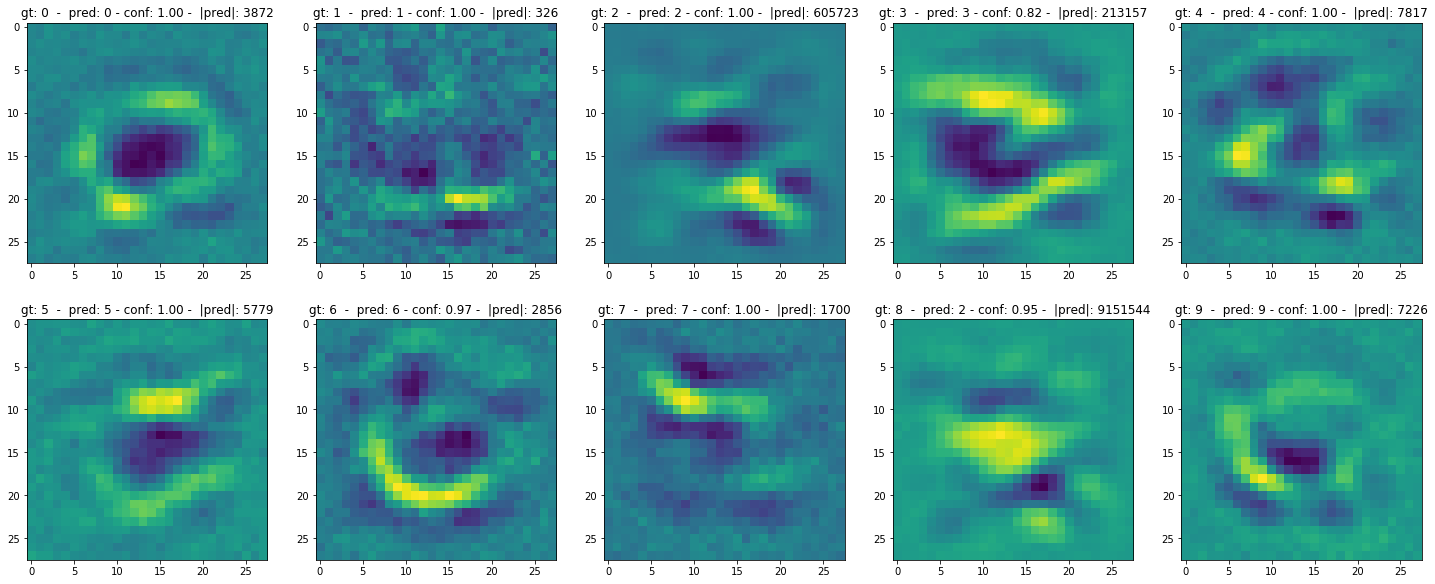

In [0]:
avgs[:,6]
# not torch.isnan(pred).sum()
# stats
# z[preds==1]
# (preds==6)
# stats


avgs[:,6].shape




# plotting  
save_path = 'drive/My Drive/classification_images/10way-weighted-2Run'
import os

# setting NANs to 0
avgs[avgs != avgs] = 0 

dd = torch.mean(avgs, dim=0)

#dd = dd - grand_mean

f, axarr = plt.subplots(2, 5)
# f.set_figheight(1.4)
# f.set_figwidth(15)
f.set_figheight(10)
f.set_figwidth(25)


for kk in range(10):
  
#   fig = plt.figure()
  a = dd[kk]
  
  a = (a -a.min()) / (a.max() -a.min())
  a = a.view(-1,28)
  
#   a[a<.4] = 0
#   a[a>=.8] = 1
  
  print(a.min(), a.max())
  b = model(a[None,None,...].cuda())

  #a = torch.nn.functional.log_softmax(a)# torch.nn.functional.softmax(a)
  conf, c = b.data.max(1) #[1]
  cc = '{:.2f}'.format(conf.cpu().data[0].numpy())
  axarr[kk//5,kk%5].set_title(f'gt: {str(kk)}  -  pred: {str(c.cpu().data[0].numpy())} - conf: {cc} -  |pred|: {stats[kk]}')  
  axarr[kk//5,kk%5].imshow(a) #, cmap = 'gray')
#   fig.savefig(os.path.join(save_path, str(kk)+'-.png'))

In [0]:
# batch_size = 10000
# all_size = 100000

# stats = dict()
# for i in range(10):
#     stats[i] = 0
    
    
# avgs = torch.zeros(100, 10, 28*28)

# for kk in range(100):
#   print(kk)
  
# #   z = torch.rand(all_size, 1, 28, 28)*2 -1 #.cuda()
#   z = torch.rand(all_size, 1, 28, 28) #.cuda()
  
#   z.cuda()
#   #plt.imshow(z[1].reshape(28,28))


#   all_preds = []
#   all_idx = torch.ones(all_size, dtype = torch.uint8)
#   for k in range(0,all_size, batch_size):
#       y_pred = model(z[k:k+batch_size].cuda())
#       #y_pred[y_pred < 0]= 0

#       indices = torch.ones(y_pred.size(0), dtype = torch.uint8)
#       indices[torch.mean(y_pred, dim =1)==0] = 0 

#       all_idx[k:k+batch_size] = indices 
#       pred = y_pred[indices==1].data.max(1)[1]

#       all_preds.append(pred)

#   pred = torch.cat(all_preds)

#   for i in range(10):
#     stats[i] += torch.sum(pred==i)
  
#   z = z[all_idx]
#   for i in range(10):
#       a = torch.mean(z[pred==i] , dim=0) 
#       avgs[kk, i] = a.reshape(28*28)


In [0]:
z = torch.rand(1000000, 784)
grand_mean = torch.mean(z,dim=0)

In [0]:
# torch.nn.functional.softmax(a)
# d = defaultdict()

NameError: ignored

In [0]:
stats

{0: tensor(23707, device='cuda:0'),
 1: tensor(163622, device='cuda:0'),
 2: tensor(627403, device='cuda:0'),
 3: tensor(311850, device='cuda:0'),
 4: tensor(67331, device='cuda:0'),
 5: tensor(143501, device='cuda:0'),
 6: tensor(2936, device='cuda:0'),
 7: tensor(7869, device='cuda:0'),
 8: tensor(8647992, device='cuda:0'),
 9: tensor(3789, device='cuda:0')}

In [0]:
# grand_mean.shape
import sklearn
from sklearn import metrics
sklearn.metrics.confusion_matrix(pred.cpu().numpy(), evaluate_y.cpu().numpy())


array([[  2,   3,   2,   2,   3,   1,   2,   4,   2,   3],
       [ 14,  17,  15,  17,  14,  20,   8,  19,  19,  21],
       [ 55,  81,  56,  69,  52,  68,  61,  59,  52,  63],
       [ 29,  41,  33,  28,  31,  35,  27,  23,  40,  27],
       [ 10,   9,   2,  11,   7,   7,   6,  11,   7,   5],
       [ 14,  14,  17,  20,  10,   7,  18,  16,   7,  10],
       [  1,   0,   0,   0,   0,   0,   0,   0,   2,   1],
       [  1,   0,   1,   0,   1,   0,   2,   0,   1,   0],
       [853, 970, 906, 863, 862, 754, 833, 896, 843, 878],
       [  1,   0,   0,   0,   2,   0,   1,   0,   1,   1]])

In [0]:
b.data.max(1)[1]
b
a.shape
# avgs

torch.Size([1, 28, 28])

In [0]:
for i in range(10):
    print(torch.sum(pred==i))  


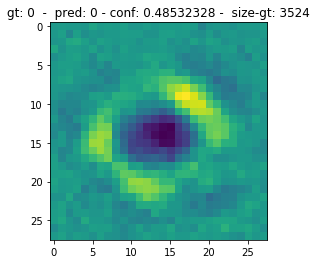

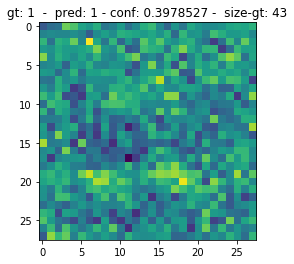

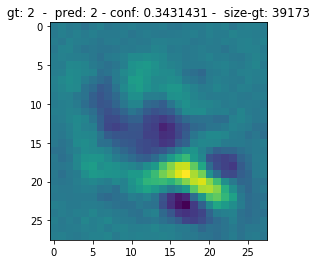

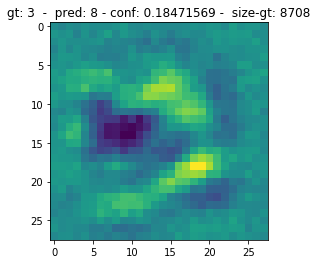

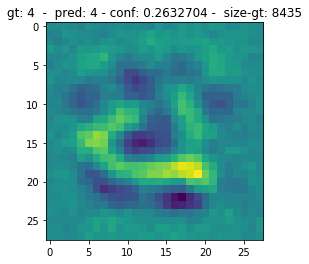

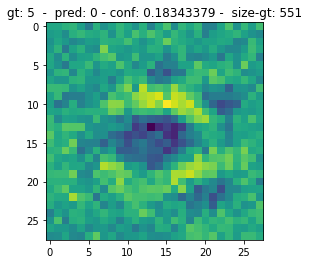

/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


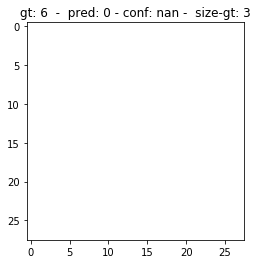

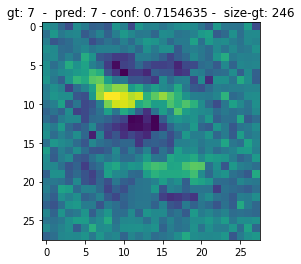

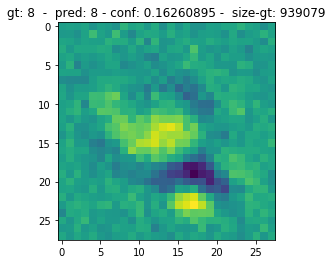

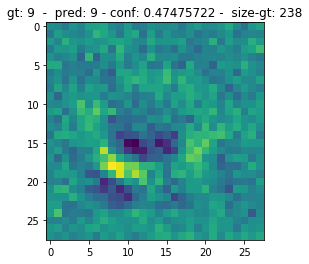

In [0]:
#   
# - load the model
# - modulate the input
# - see how many are classified as the pattern

import os

model = Model()
if cuda:
    model.cuda() # CUDA!
    
model = torch.load(os.path.join(save_path, 'cnn.pth'))



In [0]:
import torch.nn.functional as F
def resize2d(img, size):
    return (F.adaptive_avg_pool2d(Variable(img,volatile=True), size)).data

  
from skimage import io, transform  
import sklearn
from sklearn import metrics


import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # for reading image
import matplotlib.cm as cm

import os

# https://stackoverflow.com/questions/25862026/turn-off-axes-in-subplots/25864515


tensor([8, 8, 2, 8, 6, 4, 5, 8, 8, 8, 8, 8, 5, 5, 8, 8, 2, 8, 3, 2, 8, 8, 8, 8,
        3, 8, 2, 0, 8, 8, 8, 8, 3, 8, 8, 2, 3, 8, 2, 8, 2, 8, 2, 8, 3, 4, 8, 2,
        2, 5, 5, 8, 8, 8, 8, 2, 2, 2, 0, 8, 4, 8, 8, 8, 8, 2, 8, 8, 3, 3, 2, 8,
        8, 8, 8, 4, 8, 8, 8, 2, 8, 2, 8, 8, 8, 8, 8, 5, 4, 8, 8, 8, 8, 2, 8, 8,
        8, 8, 6, 8])


([<matplotlib.axis.XTick at 0x7f90fd192400>,
 <a list of 9 Text xticklabel objects>)

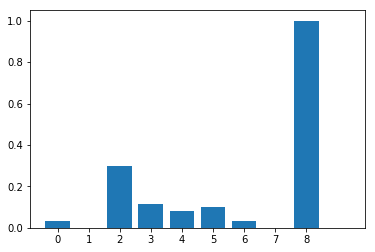

In [0]:
z.max()
plt.figure()
y_pred = model(z.cuda())
preds = y_pred.data.max(1)[1].cpu()
print(preds)
freq = numpy.histogram(preds.numpy(), bins=list(range(11))) 
y_pos = np.arange(len(freq[0]))
plt.bar(y_pos, freq[0]/freq[0].max())
plt.xticks(list(range(9)))

In [0]:
# torch.histc(preds.type(torch.FloatTensor), bins=10)
(preds==8).sum()
# numpy.coun
freq
weights = np.linspace(0,10,11)
for weight in weights:
  print(weight)

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0


In [0]:
mean_imgs

[tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.1611e-02,
          4.2715e-02, 1.7559e-02, 0.0000e+00, 1.5195e-02, 4.1533e-02, 1.9754e-02,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 4.8962e-03, 1.6883e-03, 0.0000e+00,
          1.4351e-02, 3.3767e-02, 7.4287e-03, 0.0000e+00, 0.0000e+00, 1.5533e-02,
          4.7611e-02, 7.9183e-02, 3.3091e-02, 2.9208e-02, 3.86

In [0]:
# load the zero image
# objects = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# save_path = 'drive/My Drive/classification_images/10way-weighted'
save_path = 'drive/My Drive/classification_images/10way-weighted-2Run'



weights =  np.linspace(0,1,11)

res = np.zeros((5,11))

for rep in range(1):

  for weight in weights:
    z = torch.rand(10000, 1, 28, 28) #.cuda()


    # frequency of noise predictions
    f, axarr = plt.subplots(11, 3)
    # f.set_figheight(1.4)
    # f.set_figwidth(15)
    f.set_figheight(15)
    f.set_figwidth(15)




    # fixed noise 
    axarr[0,0].imshow(torch.torch.ones_like(torch.squeeze(z[0,...],0)))
    axarr[0,0].axis('off')


    # fixed noise 
    axarr[0,1].imshow(torch.squeeze(z[0,...],0))
    axarr[0,1].axis('off')



    y_pred = model(z.cuda())
    preds = y_pred.data.max(1)[1].cpu()
    # print(preds)
    freq = numpy.histogram(preds.numpy(), bins=list(range(11))) 
    y_pos = np.arange(len(freq[0]))
    axarr[0,2].bar(y_pos, freq[0]/freq[0].sum())
    axarr[0,2].set_yticks([0.5,1]) 
    # axarr[0,2].set_xticks(list(range(9))) 
    # axarr[0,2].set_ylim([0,1])
    # axarr[0,2].axis('on')



    # plt.subplots_adjust(hspace=0.01, wspace=0.01)
    # plt.show()




    # f, axarr = plt.subplots(10, 3, )
    # f.set_figheight(15)
    # f.set_figwidth(15)

    mis_class = []

    for i in range(1,11):
      # pattern
      pattern = io.imread(os.path.join(save_path, str(i-1) + '-.png'))
      pattern = pattern[35:35+217,113:330,:]
      pattern = transform.resize(pattern, (28, 28))
      pattern = torch.from_numpy(pattern)
      pattern = pattern.type(torch.FloatTensor)
      pattern = torch.mean(pattern, dim=2)
      
      # mean images
#       pattern = mean_imgs[i-1]
#       pattern = (pattern - pattern.min()) / (pattern.max() - pattern.min())
      
      
      axarr[i,0].imshow(pattern)
      axarr[i,0].axis('off')




      # pattern + noise
      z_new = (1-weight)*z + weight*pattern #/ (weight+1)  # noise + stim
    #   z_new = (z_new - z_new.min()) / (z_new.min() - z_new.min())
    #   print(z_new.min(),z_new.max())

#       axarr[i,1].imshow(torch.squeeze(z_new[0,...],0))
#       axarr[i,1].axis('off')




      # frequency of pattern + noise predictions  
      y_pred = model(z_new.cuda())
      preds = y_pred.data.max(1)[1].cpu()
    #   print(preds)  
      freq = numpy.histogram(preds.numpy(), bins=list(range(11))) 
      y_pos = np.arange(len(freq[0]))
      axarr[i,2].bar(y_pos, freq[0]/freq[0].sum())
      axarr[i,2].set_xticks(list(range(9))) 
      axarr[i,2].set_yticks([0.5,1]) 


#       f.subplots_adjust(hspace=0.06) #, wspace=0.0, right = 0.8)
#       f.show()

    #   axarr[i,2].axis('off')

      error = (preds == i-1).sum().type(torch.FloatTensor)/preds.size(0)
    #   print(f'accuracy rate: {error}')
      mis_class.append(error)

    print(mean(mis_class))
    res[rep, int(weight*10)] = mean(mis_class)

In [0]:
# np.mean(res, axis=0)
res[0]

array([0.09999999, 0.12702   , 0.17915002, 0.31265   , 0.61754   ,
       0.84162009, 0.98592997, 0.99996996, 1.        , 1.        ,
       1.        ])

RuntimeError: ignored

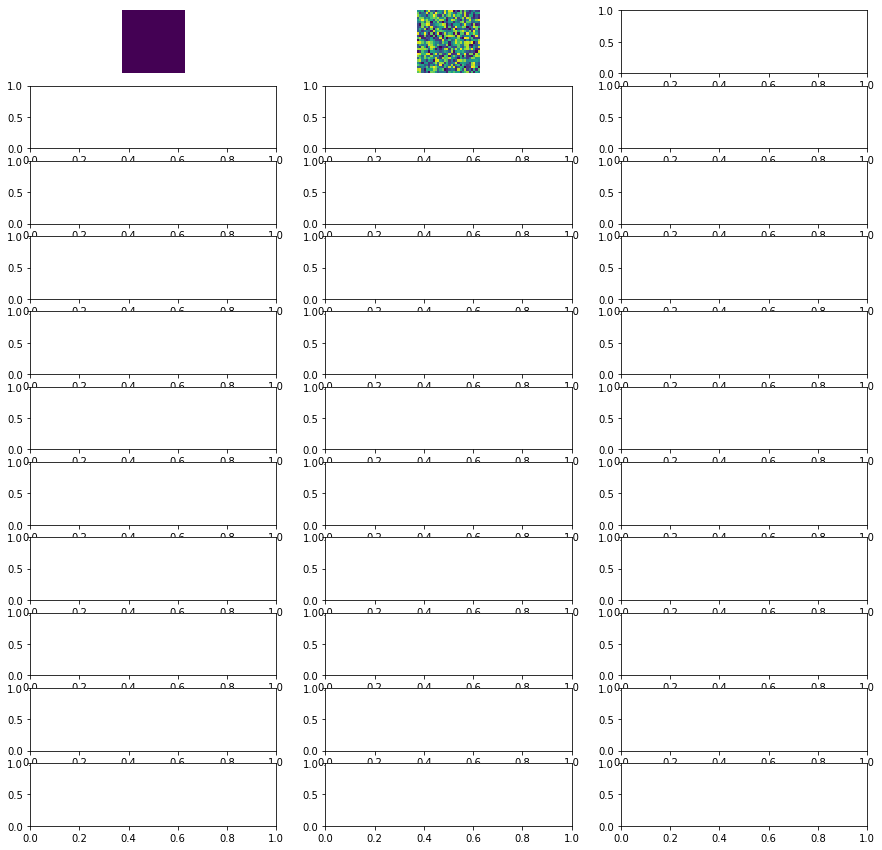

In [0]:

# with the average images instead of the classification images

# load the zero image
# objects = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# save_path = 'drive/My Drive/classification_images/10way-weighted'


z = torch.rand(10000, 1, 28, 28) #.cuda()
weight = 0


# frequency of noise predictions
f, axarr = plt.subplots(11, 3)
# f.set_figheight(1.4)
# f.set_figwidth(15)
f.set_figheight(15)
f.set_figwidth(15)




# fixed noise 
axarr[0,0].imshow(torch.torch.ones_like(torch.squeeze(z[0,...],0)))
axarr[0,0].axis('off')


# fixed noise 
axarr[0,1].imshow(torch.squeeze(z[0,...],0))
axarr[0,1].axis('off')



y_pred = model(z.cuda())
preds = y_pred.data.max(1)[1].cpu()
# print(preds)
freq = numpy.histogram(preds.numpy(), bins=list(range(11))) 
y_pos = np.arange(len(freq[0]))
axarr[0,2].bar(y_pos, freq[0]/freq[0].sum())
axarr[0,2].set_yticks([0.5,1]) 
# axarr[0,2].set_xticks(list(range(9))) 
# axarr[0,2].set_ylim([0,1])
# axarr[0,2].axis('on')



# plt.subplots_adjust(hspace=0.01, wspace=0.01)
# plt.show()




# f, axarr = plt.subplots(10, 3, )
# f.set_figheight(15)
# f.set_figwidth(15)

mis_class = []

for i in range(1,11):
  # pattern
#   pattern =  io.imread(os.path.join(save_path, str(i-1) + '-.png'))
#   pattern = pattern[35:35+217,113:330,:]
#   pattern = transform.resize(pattern, (28, 28))
#   pattern = torch.from_numpy(pattern)
#   pattern = pattern.type(torch.FloatTensor)
#   pattern = torch.mean(pattern, dim=2)

  pattern = mean_imgs[i-1]
  pattern = (pattern - pattern.min()) / (pattern.max() - pattern.min())

  axarr[i,0].imshow(pattern)
  axarr[i,0].axis('off')
  
  

  
  # pattern + noise
  z_new = (1-weight)*z + weight*pattern #/ (weight+1)  # noise + stim
#   z_new = (z_new - z_new.min()) / (z_new.min() - z_new.min())
#   print(z_new.min(),z_new.max())
  axarr[i,1].imshow(torch.squeeze(z_new[0,...],0))
  axarr[i,1].axis('off')

  
  
  
  # frequency of pattern + noise predictions  
  y_pred = model(z_new.cuda())
  preds = y_pred.data.max(1)[1].cpu()
#   print(preds)  
  freq = numpy.histogram(preds.numpy(), bins=list(range(11))) 
  y_pos = np.arange(len(freq[0]))
  axarr[i,2].bar(y_pos, freq[0]/freq[0].sum())
  axarr[i,2].set_xticks(list(range(9))) 
  axarr[i,2].set_yticks([0.5,1]) 

  
  f.subplots_adjust(hspace=0.06) #, wspace=0.0, right = 0.8)
  f.show()
  
#   axarr[i,2].axis('off')

  error = (preds == i-1).sum().type(torch.FloatTensor)/preds.size(0)
  print(f'accuracy rate: {error}')
  mis_class.append(error)
  
print(mean(mis_class))

In [0]:
import torch
torch.cuda.is_available()

False

In [0]:
mean_imgs[5].max()
# z.max()
pattern.max()

tensor(1.)

torch.Size([96, 1, 28, 28])

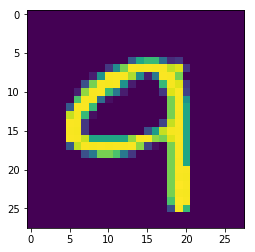

In [0]:
data = data.cpu()
plt.imshow(data[5,0])
data.shape

In [0]:
z.shape
# z.min().shape
# z

save_path

'drive/My Drive/classification_images/10way-weighted-2Run'

accuracy rate: 0.09870000183582306
accuracy rate: 0.11349999904632568
accuracy rate: 0.10220000147819519
accuracy rate: 0.10320000350475311
accuracy rate: 0.09749999642372131
accuracy rate: 0.08959999680519104
accuracy rate: 0.09539999812841415
accuracy rate: 0.10559999942779541
accuracy rate: 0.09769999980926514
accuracy rate: 0.10140000283718109
0.10048


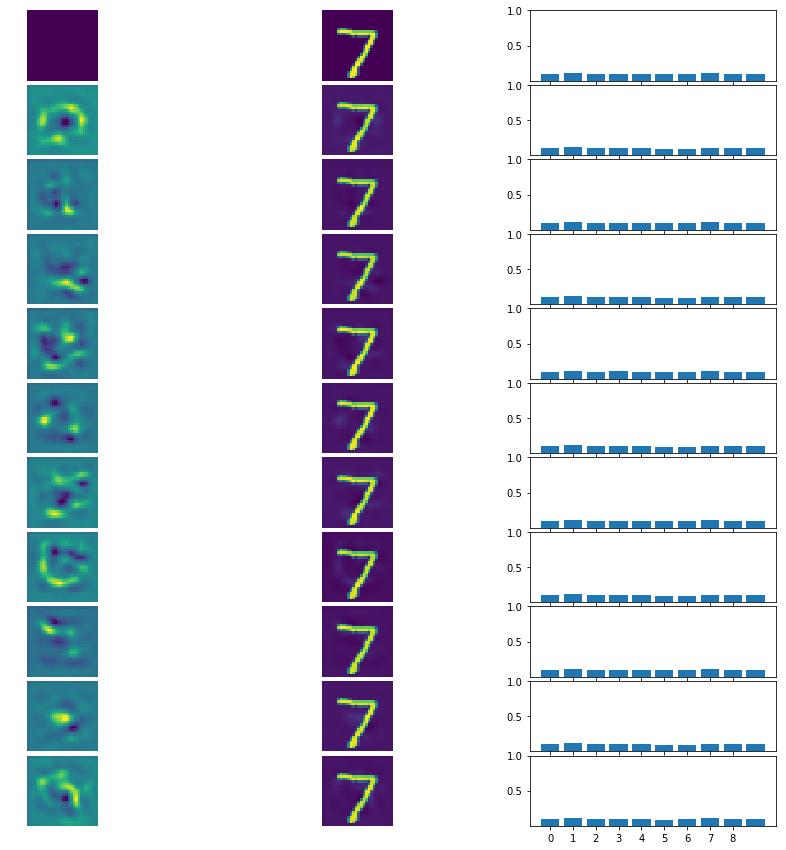

In [0]:
# load the zero image


# Load data
# data = mnist_data()

# tt = data.targets[data.targets==9]
# dd = data.data[data.targets==9] 
# data.targets = tt
# data.data = dd
# data_loader = torch.utils.data.DataLoader(data, batch_size=100, shuffle=True, drop_last =True)
# # Num batches


test = MNIST('./data', train=False, download=True, transform=transforms.Compose([
    transforms.ToTensor(), # ToTensor does min-max normalization. 
]), )

# Create DataLoader
dataloader_args = dict(shuffle=True, batch_size=256,num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)
# train_loader = dataloader.DataLoader(train, **dataloader_args)
test_loader = dataloader.DataLoader(test, **dataloader_args)


# z = next(iter(test_loader)) 
z = test.data # 10K test images
z = z[:,None,...]
z = z.type(torch.FloatTensor)
z = (z - z.min())/(z.max() - z.min())



# noise = torch.rand(1, 1, 28, 28) #.cuda()
weight = 0.5


# frequency of noise predictions
f, axarr = plt.subplots(11, 3)
# f.set_figheight(1.4)
# f.set_figwidth(15)
f.set_figheight(15)
f.set_figwidth(15)




# fixed noise 
axarr[0,0].imshow(torch.torch.ones_like(torch.squeeze(z[0,...],0)))
axarr[0,0].axis('off')


# fixed noise 
axarr[0,1].imshow(torch.squeeze(z[0,...],0))
axarr[0,1].axis('off')



y_pred = model(z.cuda())
preds = y_pred.data.max(1)[1].cpu()
# print(preds)
freq = numpy.histogram(preds.numpy(), bins=list(range(11))) 
y_pos = np.arange(len(freq[0]))
axarr[0,2].bar(y_pos, freq[0]/freq[0].sum())
axarr[0,2].set_yticks([0.5,1]) 


mis_class = []


for i in range(1,11):
  # pattern
  pattern =  io.imread(os.path.join(save_path, str(i-1) + '-.png'))
  pattern = pattern[35:35+217,113:330,:]
  pattern = transform.resize(pattern, (28, 28))
  pattern = torch.from_numpy(pattern)
  pattern = pattern.type(torch.FloatTensor)
  pattern = torch.mean(pattern, dim=2)

#   pattern = (pattern - pattern.min()) / (pattern.max() - pattern.min())  
    
  axarr[i,0].imshow(pattern)
  axarr[i,0].axis('off')
  
  
  # pattern + noise
  z_new = (1-weight)*z + weight*pattern #/ (weight+1)  # noise + stim
#   z_new = z + weight*z*pattern # multiplication
  
  
#   z_new = (z_new - z_new.min()) / (z_new.max() - z_new.min())
#   print(z_new.min(),z_new.max())
  axarr[i,1].imshow(torch.squeeze(z_new[0,...],0))
  axarr[i,1].axis('off')
  
  
  # frequency of pattern + noise predictions  
  y_pred = model(z_new.cuda())
  preds = y_pred.data.max(1)[1].cpu()
#   print(preds)  
  freq = numpy.histogram(preds.numpy(), bins=list(range(11))) 
  y_pos = np.arange(len(freq[0]))
  axarr[i,2].bar(y_pos, freq[0]/freq[0].sum())
  axarr[i,2].set_xticks(list(range(9))) 
  axarr[i,2].set_yticks([0.5,1]) 
  preds 
  
  f.subplots_adjust(hspace=0.06) #, wspace=0.0, right = 0.8)
  f.show()
  
  
#   error = (preds != test.targets).sum().type(torch.FloatTensor)/preds.size(0)
  error = (preds == i-1).sum().type(torch.FloatTensor)/preds.size(0)  
  print(f'accuracy rate: {error}')
  mis_class.append(error)
  
print(mean(mis_class))

accuracy rate: 1.0
accuracy rate: 1.0
accuracy rate: 1.0
accuracy rate: 1.0
accuracy rate: 1.0
accuracy rate: 1.0
accuracy rate: 1.0
accuracy rate: 1.0
accuracy rate: 1.0
accuracy rate: 1.0
1.0


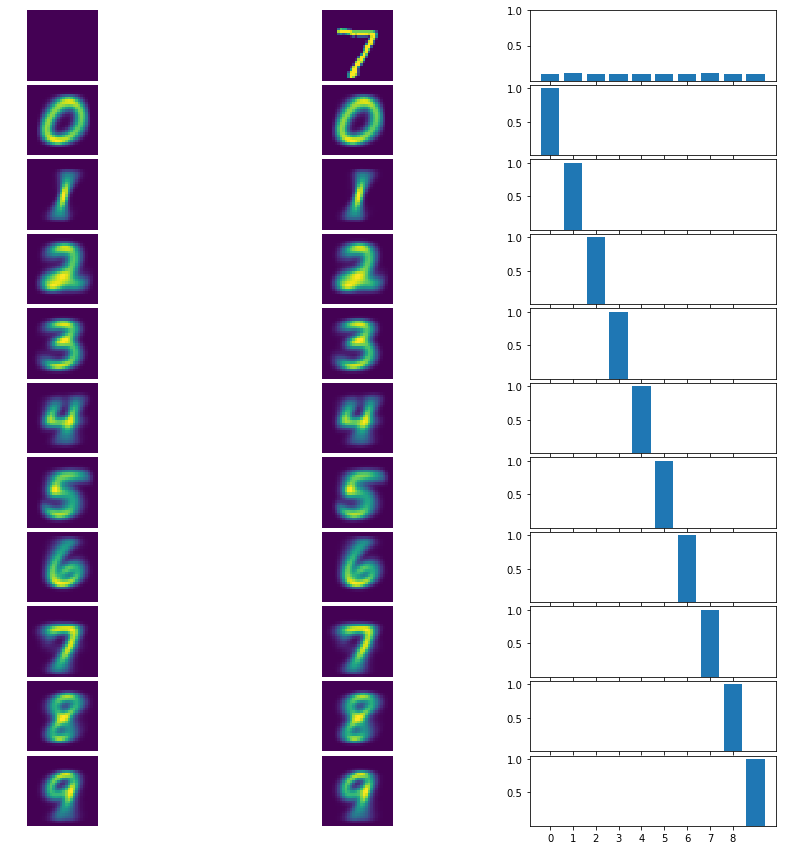

In [0]:
# with the average images instead of the classification images

# load the zero image
# objects = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# save_path = 'drive/My Drive/classification_images/10way-weighted'

# z = next(iter(test_loader)) 
z = test.data # 10K test images
z = z[:,None,...]
z = z.type(torch.FloatTensor)
z = (z - z.min())/(z.max() - z.min())



# z = torch.rand(10000, 1, 28, 28) #.cuda()
weight = 1


# frequency of noise predictions
f, axarr = plt.subplots(11, 3)
# f.set_figheight(1.4)
# f.set_figwidth(15)
f.set_figheight(15)
f.set_figwidth(15)




# fixed noise 
axarr[0,0].imshow(torch.torch.ones_like(torch.squeeze(z[0,...],0)))
axarr[0,0].axis('off')


# fixed noise 
axarr[0,1].imshow(torch.squeeze(z[0,...],0))
axarr[0,1].axis('off')



y_pred = model(z.cuda())
preds = y_pred.data.max(1)[1].cpu()
# print(preds)
freq = numpy.histogram(preds.numpy(), bins=list(range(11))) 
y_pos = np.arange(len(freq[0]))
axarr[0,2].bar(y_pos, freq[0]/freq[0].sum())
axarr[0,2].set_yticks([0.5,1]) 
# axarr[0,2].set_xticks(list(range(9))) 
# axarr[0,2].set_ylim([0,1])
# axarr[0,2].axis('on')



# plt.subplots_adjust(hspace=0.01, wspace=0.01)
# plt.show()




# f, axarr = plt.subplots(10, 3, )
# f.set_figheight(15)
# f.set_figwidth(15)

mis_class = []

for i in range(1,11):
  # pattern
#   pattern =  io.imread(os.path.join(save_path, str(i-1) + '-.png'))
#   pattern = pattern[35:35+217,113:330,:]
#   pattern = transform.resize(pattern, (28, 28))
#   pattern = torch.from_numpy(pattern)
#   pattern = pattern.type(torch.FloatTensor)
#   pattern = torch.mean(pattern, dim=2)

  pattern = mean_imgs[i-1]
  pattern = (pattern - pattern.min()) / (pattern.max() - pattern.min())

  axarr[i,0].imshow(pattern)
  axarr[i,0].axis('off')
  
  

  
  # pattern + noise
  z_new = (1-weight)*z + weight*pattern #/ (weight+1)  # noise + stim
#   z_new = (z_new - z_new.min()) / (z_new.min() - z_new.min())
#   print(z_new.min(),z_new.max())
  axarr[i,1].imshow(torch.squeeze(z_new[0,...],0))
  axarr[i,1].axis('off')

  
  
  
  # frequency of pattern + noise predictions  
  y_pred = model(z_new.cuda())
  preds = y_pred.data.max(1)[1].cpu()
#   print(preds)  
  freq = numpy.histogram(preds.numpy(), bins=list(range(11))) 
  y_pos = np.arange(len(freq[0]))
  axarr[i,2].bar(y_pos, freq[0]/freq[0].sum())
  axarr[i,2].set_xticks(list(range(9))) 
  axarr[i,2].set_yticks([0.5,1]) 

  
  f.subplots_adjust(hspace=0.06) #, wspace=0.0, right = 0.8)
  f.show()
  
#   axarr[i,2].axis('off')

  error = (preds == i-1).sum().type(torch.FloatTensor)/preds.size(0)
  print(f'accuracy rate: {error}')
  mis_class.append(error)
  
print(mean(mis_class))

In [0]:
mean(mis_class)

0.11918

In [0]:
pattern =  io.imread(os.path.join(save_path, str(i) + '-.png'))
pattern = transform.resize(pattern, (28, 28))
pattern.shape
pattern = torch.mean(pattern, dim=2)


https://stackoverflow.com/questions/19626530/python-xticks-in-subplots

TypeError: ignored

In [0]:
# digits = next(iter(train_loader))

# 1326/2000

tensor(0.1326)

In [0]:
from torchvision import transforms, datasets
def mnist_data():
    compose = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((.5), (.5))         
#          transforms.Normalize((.5, .5, .5), (.5, .5, .5))
        ])
    transform = transforms.Compose([
        transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])    
    
    out_dir = './dataset'
    return datasets.MNIST(root=out_dir, train=True, transform=transform, download=True)




In [0]:
train_loader

AttributeError: ignored

tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9], device='cuda:0')
tensor([0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 7, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], device='cuda:0')
tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 

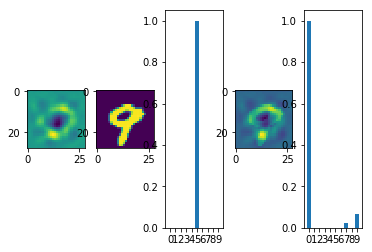

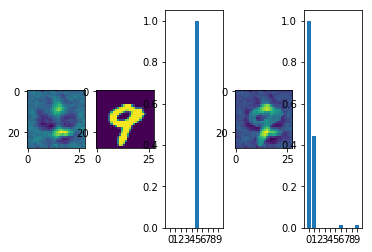

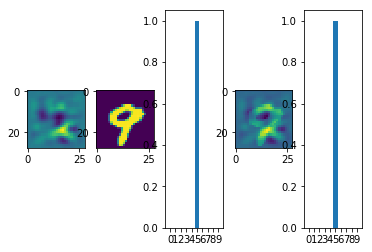

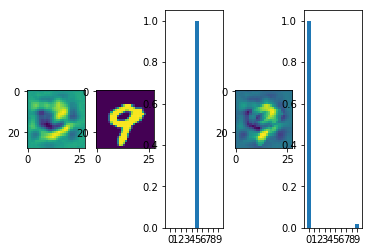

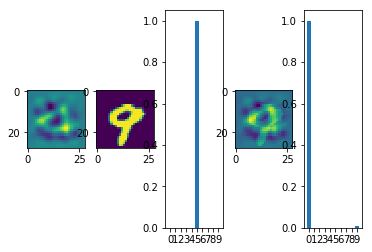

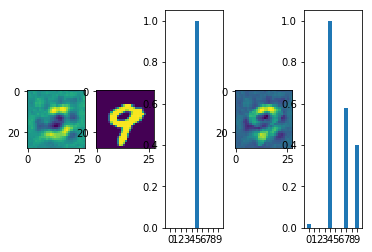

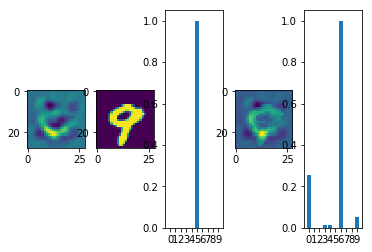

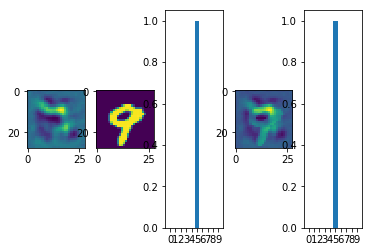

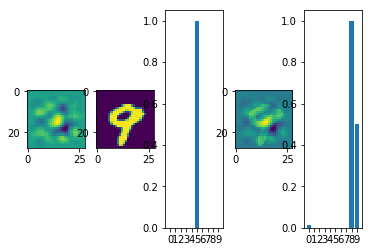

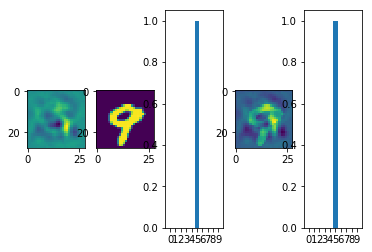

In [0]:
# ls 'drive/My Drive/classification_images'
# torch.squeeze(z[0,...],0).shape
# plt.hist(y_pred.data.max(1)[1].cpu())

objects = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

# evaluate_x = Variable(test_loader.dataset.test_data.type_as(torch.FloatTensor()))
# evaluate_y = Variable(test_loader.dataset.test_labels)
# if cuda:
#     evaluate_x, evaluate_y = evaluate_x.cuda(), evaluate_y.cuda()


#digits = next(iter(train_loader))



# Load data
data = mnist_data()

tt = data.targets[data.targets==9]
dd = data.data[data.targets==9] 
data.targets = tt
data.data = dd
data_loader = torch.utils.data.DataLoader(data, batch_size=100, shuffle=True, drop_last =True)
# Num batches

z = next(iter(data_loader)) 


for i in range(10):

  pattern =  io.imread(os.path.join(save_path, str(i) + '-.png'))
  pattern = pattern[35:35+217,113:330,0]
  pattern = transform.resize(pattern, (28, 28))
  # pattern = torch.from_numpy(pattern)

  pattern = torch.from_numpy(pattern)
  pattern = pattern.type(torch.FloatTensor)

  plt.figure()
  plt.subplot(151)
  plt.imshow(pattern)

  z_old = (z[0] + 1)/2
  
  plt.subplot(152)
  plt.imshow(torch.squeeze(z_old[0,...],0))

  y_pred = model(z_old.cuda())
  print(y_pred.data.max(1)[1])
  
  
  plt.subplot(153)
  freq = y_pred.data.max(1)[1].cpu()
  aa = numpy.histogram(freq.numpy()) 
  y_pos = np.arange(len(aa[0]))
  plt.bar(y_pos, aa[0]/aa[0].max())
  plt.xticks(y_pos, objects)

  
  z_new = .3*z_old + pattern

  plt.subplot(154)
  plt.imshow(torch.squeeze(z_new[0,...],0))

  y_pred = model(z_new.cuda())
#   print(y_pred.data.max(1)[1])
  
  plt.subplot(155)
  freq = y_pred.data.max(1)[1].cpu()
  aa = numpy.histogram(freq.numpy()) 
  y_pos = np.arange(len(aa[0]))
  plt.bar(y_pos, aa[0]/aa[0].max())
  plt.xticks(y_pos, objects)
  print(y_pred.data.max(1)[1])
#   plt.bar()
#   plt.hist(y_pred.data.max(1)[1].cpu())

In [0]:
  z.min()

tensor(0.)

In [0]:
for i in range(10):
    print(torch.sum(pred==i))

tensor(236, device='cuda:0')
tensor(3, device='cuda:0')
tensor(1874, device='cuda:0')
tensor(160, device='cuda:0')
tensor(2689, device='cuda:0')
tensor(22, device='cuda:0')
tensor(44, device='cuda:0')
tensor(81, device='cuda:0')
tensor(93796, device='cuda:0')
tensor(98, device='cuda:0')


In [0]:
# ls
from google.colab import files
files.download('./*.png')


FileNotFoundError: ignored

In [0]:
ls drive/My\ Drive/classification_images


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


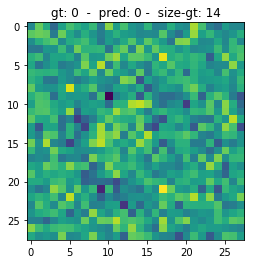

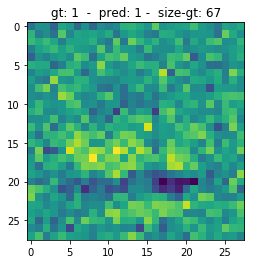

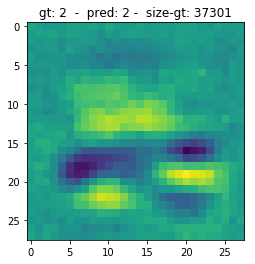

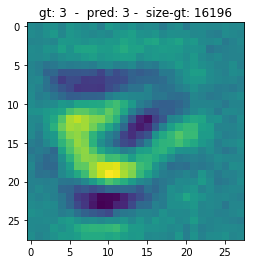

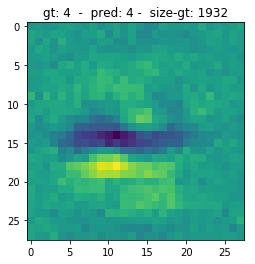

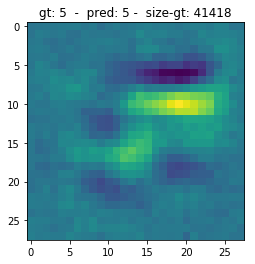

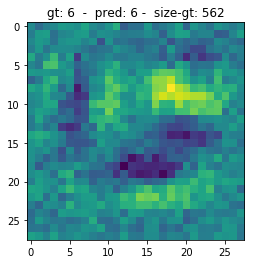

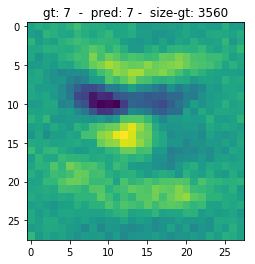

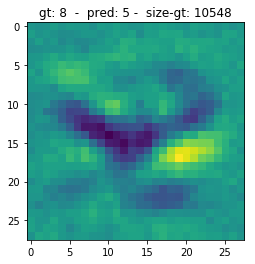

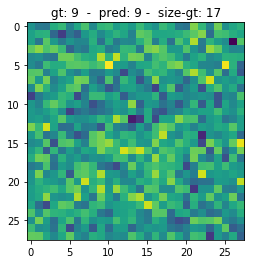

In [0]:
# z = z[all_idx]
pred = torch.cat(all_preds)
for i in range(10):
    plt.figure()
    a = torch.mean(z[pred==i] , dim=0) 
    a = a.view(-1,28)
    b = model(a[None,None,...].cuda())
    c = b.data.max(1)[1]
    plt.title(f'gt: {str(i)}  -  pred: {str(c.cpu().data[0].numpy())} -  size-gt: {z[pred==i].size(0)}')
    plt.imshow(1-a)

In [0]:
# for i in range(z.size(0)):
#   print(torch.max(data[1,0]))

In [0]:
# Repeating the above experiment with VGG and ResNet 
# VGG16

# https://towardsdatascience.com/model-summary-in-pytorch-b5a1e4b64d25


import torch
from torchvision import models
from torchsummary import summary
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vgg = models.vgg16().to(device)
summary(vgg, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [0]:
# ResNet

# https://zablo.net/blog/post/using-resnet-for-mnist-in-pytorch-tutorial/


def resnet18(pretrained=False, **kwargs):
    """Constructs a ResNet-18 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(BasicBlock, [2, 2, 2, 2], **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['resnet18']))
    return model
  
  

def forward(self, x):
    x = self.conv1(x)
    x = self.bn1(x)
    ## ... skipped a few lines ...
    return x
  
self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)



class MnistResNet(ResNet):
    def __init__(self):
        super(MnistResNet, self).__init__(BasicBlock, [2, 2, 2, 2], num_classes=10)
        self.conv1 = torch.nn.Conv2d(1, 64, 
            kernel_size=(7, 7), 
            stride=(2, 2), 
            padding=(3, 3), bias=False)
        
    def forward(self, x):
        return torch.softmax(
            super(MnistResNet, self).forward(x), dim=-1)

      
      
from torchvision.models.resnet import ResNet, BasicBlock
from torchvision.datasets import MNIST
from tqdm.autonotebook import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import inspect
import time
from torch import nn, optim
import torch
from torchvision.transforms import Compose, ToTensor, Normalize, Resize
from torch.utils.data import DataLoader





NameError: ignored

In [0]:
# model:
model = YourModelHere()

# params you need to specify:
epochs = 5
train_loader, val_loader = # put your data loader here
loss_function = nn.CrossEntropyLoss() # your loss function, cross entropy works well for multi-class problems

# optimizer, I've used Adadelta, as it wokrs well without any magic numbers
optimizer = optim.Adadelta(model.parameters())

start_ts = time.time()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

losses = []
batches = len(train_loader)
val_batches = len(val_loader)

# loop for every epoch (training + evaluation)
for epoch in range(epochs):
    total_loss = 0

    # progress bar (works in Jupyter notebook too!)
    progress = tqdm(enumerate(train_loader), desc="Loss: ", total=batches)

    # ----------------- TRAINING  -------------------- 
    # set model to training
    model.train()
    
    for i, data in progress:
        X, y = data[0].to(device), data[1].to(device)
        
        # training step for single batch
        model.zero_grad()
        outputs = model(X)
        loss = loss_function(outputs, y)
        loss.backward()
        optimizer.step()

        # getting training quality data
        current_loss = loss.item()
        total_loss += current_loss

        # updating progress bar
        progress.set_description("Loss: {:.4f}".format(total_loss/(i+1)))
        
    # releasing unceseccary memory in GPU
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    
    # ----------------- VALIDATION  ----------------- 
    val_losses = 0
    precision, recall, f1, accuracy = [], [], [], []
    
    # set model to evaluating (testing)
    model.eval()
    with torch.no_grad():
        for i, data in enumerate(val_loader):
            X, y = data[0].to(device), data[1].to(device)

            outputs = model(X) # this get's the prediction from the network

            val_losses += loss_function(outputs, y)

            predicted_classes = torch.max(outputs, 1)[1] # get class from network's prediction
            
            # calculate P/R/F1/A metrics for batch
            for acc, metric in zip((precision, recall, f1, accuracy), 
                                   (precision_score, recall_score, f1_score, accuracy_score)):
                acc.append(
                    calculate_metric(metric, y.cpu(), predicted_classes.cpu())
                )
          
    print(f"Epoch {epoch+1}/{epochs}, training loss: {total_loss/batches}, validation loss: {val_losses/val_batches}")
    print_scores(precision, recall, f1, accuracy, val_batches)
    losses.append(total_loss/batches) # for plotting learning curve
print(f"Training time: {time.time()-start_ts}s")

SyntaxError: ignored

In [0]:
def calculate_metric(metric_fn, true_y, pred_y):
    # multi class problems need to have averaging method
    if "average" in inspect.getfullargspec(metric_fn).args:
        return metric_fn(true_y, pred_y, average="macro")
    else:
        return metric_fn(true_y, pred_y)
    
def print_scores(p, r, f1, a, batch_size):
    # just an utility printing function
    for name, scores in zip(("precision", "recall", "F1", "accuracy"), (p, r, f1, a)):
        print(f"\t{name.rjust(14, ' ')}: {sum(scores)/batch_size:.4f}")

In [0]:
def get_data_loaders(train_batch_size, val_batch_size):
    mnist = MNIST(download=False, train=True, root=".").train_data.float()
    
    data_transform = Compose([ Resize((224, 224)),ToTensor(), Normalize((mnist.mean()/255,), (mnist.std()/255,))])

    train_loader = DataLoader(MNIST(download=True, root=".", transform=data_transform, train=True),
                              batch_size=train_batch_size, shuffle=True)

    val_loader = DataLoader(MNIST(download=False, root=".", transform=data_transform, train=False),
                            batch_size=val_batch_size, shuffle=False)
    return train_loader, val_loader

<Figure size 432x288 with 0 Axes>

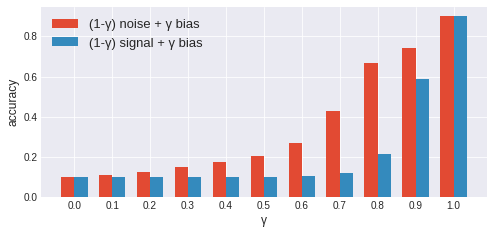

In [10]:
plt.style.use('ggplot')
# create a color palette
palette = plt.get_cmap('Set1')
plt.style.use('seaborn-darkgrid')


# noise  
a = np.array([0.1       , 0.11273001, 0.12738   , 0.14923   , 0.17384002,
       0.20746   , 0.27083001, 0.42860001, 0.66631001, 0.74269998,
       0.89999998])


# a_err = np.array([2.38418579e-08, 1.29856066e-04, 5.15420195e-04, 4.79894201e-04,
#        8.44168944e-04, 9.09090615e-04, 3.60781164e-04, 6.25288753e-04,
#        6.66184683e-04, 7.34829166e-04, 0.00000000e+00])



# a = 1-a

# signal
b = [0.1,
0.10007,
0.1002,
0.10037999,
0.10102,
0.10197,
0.104949996,
0.12264,
0.21420999,
0.58678997,
.9
]




# b = b[::-1]

plt.figure()
plt.figure(figsize=(8,3.5))
N = 11
men_means = a
women_means = np.asarray(b)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, men_means, width, label='(1-γ) noise + γ bias')#, yerr=a_err)
plt.bar(ind + width, women_means, width,
    label='(1-γ) signal + γ bias')

plt.ylabel('accuracy')
# plt.title('(1-γ) A + γ Bias')

plt.xticks(ind + width / 2, )
plt.xticks(ind + width / 2, ['{:02.1f}'.format(i) for i in np.linspace(0,1,N)] )
plt.legend(loc='best', fontsize=13)
plt.xlabel('γ')
plt.show()





<Figure size 432x288 with 0 Axes>

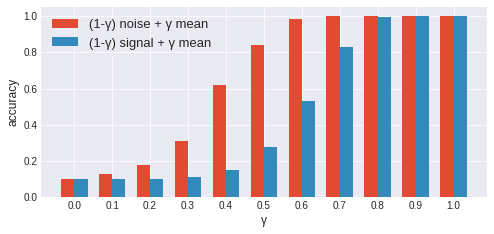

In [9]:
plt.style.use('ggplot')
# create a color palette
palette = plt.get_cmap('Set1')
plt.style.use('seaborn-darkgrid')



# γ
# len(a)



# with mean images


a = np.array([0.09999999, 0.12702   , 0.17915002, 0.31265   , 0.61754   ,
       0.84162009, 0.98592997, 0.99996996, 1.        , 1.        ,
       1.        ])


# a_err = np.array([0.00000000e+00, 7.80569100e-04, 9.68813166e-04, 2.13597141e-03,
#        1.70586286e-03, 2.99506070e-04, 6.11228336e-05, 0.00000000e+00,
#        0.00000000e+00, 0.00000000e+00, 0.00000000e+00])


# a = 1-a


b = [0.1,
0.10064,
0.102560006,
0.109469995,
0.149,
0.27971,
0.53397,
0.83037996,
0.99373007,
1,
1
]


# b = b[::-1]


plt.figure()
plt.figure(figsize=(8,3.5))
N = 11
men_means = a
women_means = np.asarray(b)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, men_means, width, label='(1-γ) noise + γ mean') #, yerr = a_err)
plt.bar(ind + width, women_means, width,
    label='(1-γ) signal + γ mean')

plt.ylabel('accuracy')
# plt.title('(1-γ) A + γ Bias')

plt.xticks(ind + width / 2, )
plt.xticks(ind + width / 2, ['{:02.1f}'.format(i) for i in np.linspace(0,1,N)] )
plt.legend(loc='best', fontsize=13)
plt.xlabel('γ')
plt.show()
# plt.



In [0]:
np.linspace(.1,1,10)
str(np.linspace(.1,1,10) )

indx = ['{:02.1f}'.format(i) for i in np.linspace(.1,1,10)]
indx

['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']

In [0]:
# {':2f'}.format(3.21)
'{:06.2f}'.format(3.141592653589793)


'003.14'

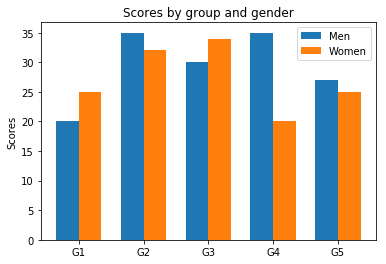

In [0]:
%matplotlib inline
N = 5
men_means = (20, 35, 30, 35, 27)
women_means = (25, 32, 34, 20, 25)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, men_means, width, label='Men')
plt.bar(ind + width, women_means, width,
    label='Women')

plt.ylabel('Scores')
plt.title('Scores by group and gender')

plt.xticks(ind + width / 2, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.legend(loc='best')
plt.show()

In [0]:



# noise  
a = np.array([0.1       , 0.11273001, 0.12738   , 0.14923   , 0.17384002,
       0.20746   , 0.27083001, 0.42860001, 0.66631001, 0.74269998,
       0.89999998])


# a_err = np.array([2.38418579e-08, 1.29856066e-04, 5.15420195e-04, 4.79894201e-04,
#        8.44168944e-04, 9.09090615e-04, 3.60781164e-04, 6.25288753e-04,
#        6.66184683e-04, 7.34829166e-04, 0.00000000e+00])



# a = 1-a

# signal
b = [0.1,
0.10007,
0.1002,
0.10037999,
0.10102,
0.10197,
0.104949996,
0.12264,
0.21420999,
0.58678997,
.9
]



In [0]:
for i in a:
  print('{0.03f}'.format(str(i)))

AttributeError: ignored

In [0]:
rr = numpy.round(b,3)
'&'.join(list(rr))

TypeError: ignored

In [0]:
rr = numpy.round(b,3)
' & '.join([str(k) for k in list(rr)])

'0.1 & 0.101 & 0.103 & 0.109 & 0.149 & 0.28 & 0.534 & 0.83 & 0.994 & 1.0 & 1.0'

In [0]:
''.join(list(rr))

TypeError: ignored